In [172]:
import pandas as pd
import numpy as np
from collections import Counter
from ast import literal_eval
import re
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

Code to mount google drive


In [173]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# All MIMIC III

<h3> Tables 'adm_icd' and 'diagnoses_icd'
<p>'adm_icd' contains all the Admission Ids of the MIMIC database. <br>
There are total <strong><u>58976</u></strong> admisssion ids.</p>
 <p>Out of which <strong><u>47</u></strong>  do not have any ICD9 codes corresponding to them (NaN values). So we have total of <strong><u>58929</u></strong> in this table with correponding ICD9 codes and converted ICD10 codes.
 <p>There are <strong><u>6984</u></strong>unique ICD9 codes and <strong><u>942</u></strong> ICD9 categories.

In [174]:
allmimic=pd.read_csv('/content/drive/My Drive/AlgoIntern/Data/Data0.0/DIAGNOSES_ICD.csv')

In [175]:
allmimic

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254
...,...,...,...,...,...
651042,639798,97503,188195,2.0,20280
651043,639799,97503,188195,3.0,V5869
651044,639800,97503,188195,4.0,V1279
651045,639801,97503,188195,5.0,5275


In [176]:
# number of unique patients
allmimic.SUBJECT_ID.nunique()

46520

In [177]:
# unique admission records
allmimic.HADM_ID.nunique()

58976

In [178]:
# number of unique ICD9 codes
allmimic.ICD9_CODE.nunique()

6984

In [179]:
# finding if there is null HADM_ID or not 
allmimic.loc[allmimic.HADM_ID.isna()].count()

ROW_ID        0
SUBJECT_ID    0
HADM_ID       0
SEQ_NUM       0
ICD9_CODE     0
dtype: int64

In [180]:
# finding if there is null ICD9 code or not
allmimic.loc[allmimic.ICD9_CODE.isna()].count()

ROW_ID        47
SUBJECT_ID    47
HADM_ID       47
SEQ_NUM        0
ICD9_CODE      0
dtype: int64

In [181]:
# all admids that do not have icd9code with them
admids_without_icd9code=allmimic.loc[allmimic.ICD9_CODE.isna()].HADM_ID.to_list()

In [182]:
print(len(admids_without_icd9code))
print(admids_without_icd9code)

47
[102633, 174817, 177274, 135580, 126808, 159800, 170307, 111608, 116945, 184025, 171183, 108282, 188023, 123220, 129620, 113170, 154602, 148742, 190435, 160049, 110220, 102096, 176570, 199739, 186323, 196087, 144751, 142890, 140889, 194017, 119146, 186175, 163059, 105970, 152077, 166997, 109963, 152368, 182322, 196643, 104588, 154166, 173766, 153208, 182252, 110368, 112990]


In [183]:
allmimic.loc[allmimic['HADM_ID'].isin(admids_without_icd9code)]

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
5251,5029,417,102633,NaN,NaN
8354,7969,690,174817,NaN,NaN
9691,10924,937,177274,NaN,NaN
18667,16813,1490,135580,NaN,NaN
27313,37428,3369,126808,NaN,NaN
39787,53456,4791,159800,NaN,NaN
55284,45143,4023,170307,NaN,NaN
82223,98541,8818,111608,NaN,NaN
92219,84252,7544,116945,NaN,NaN
97533,88308,7880,184025,NaN,NaN


To have toplevel category (ICD9 category) from ICD9 code following conversion is required:
> "The code field for the ICD-9-CM Principal and Other Diagnosis Codes is six characters in length, with the decimal point implied between the third and fourth digit for all diagnosis codes other than the V codes. The decimal is implied for V codes between the second and third digit." [LINK](https://mimic.physionet.org/mimictables/diagnoses_icd/)


In [184]:
# convering ICD9code to ICD9 category
def icd9category(x):
  """
   This function takes ICD9 CODE and extracts
   the ICD9 CATEGORY
  """

  if type(x)==str:
    return re.split("(\d{3}|V\d{2}|E\d{3})",x)[1]
  else:
    return None

In [185]:
# Testing the function
icd9category('84589')

'845'

In [186]:
allmimic['ICD9_CATEGORY']=allmimic.ICD9_CODE.apply(icd9category)

In [187]:
allmimic

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,ICD9_CATEGORY
0,1297,109,172335,1.0,40301,403
1,1298,109,172335,2.0,486,486
2,1299,109,172335,3.0,58281,582
3,1300,109,172335,4.0,5855,585
4,1301,109,172335,5.0,4254,425
...,...,...,...,...,...,...
651042,639798,97503,188195,2.0,20280,202
651043,639799,97503,188195,3.0,V5869,V58
651044,639800,97503,188195,4.0,V1279,V12
651045,639801,97503,188195,5.0,5275,527


In [188]:
# find ICD9 codes starting with E or V
allmimic.loc[allmimic.ICD9_CODE.str.contains('[VE]\d*',regex=True,na=False)]

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,ICD9_CATEGORY
27,1324,109,173633,14.0,V4511,V45
54,1514,115,114585,13.0,V1000,V10
55,1515,115,114585,14.0,V453,V45
56,1516,115,114585,15.0,V5865,V58
59,1519,115,114585,18.0,E9320,E932
...,...,...,...,...,...,...
651021,639777,97488,161999,22.0,E8798,E879
651023,639779,97488,161999,24.0,V4986,V49
651039,639795,97497,168949,8.0,V5861,V58
651043,639799,97503,188195,3.0,V5869,V58


In [189]:
# finding if there is null ICD9 category or not
allmimic.loc[allmimic.ICD9_CATEGORY.isna()].count()

ROW_ID           47
SUBJECT_ID       47
HADM_ID          47
SEQ_NUM           0
ICD9_CODE         0
ICD9_CATEGORY     0
dtype: int64

In [190]:
# admids that do not have ICD9 category 
admids_without_icd9category=allmimic.loc[allmimic.ICD9_CATEGORY.isna()].HADM_ID.to_list()

In [191]:
print(len(admids_without_icd9category))
print(admids_without_icd9category)

47
[102633, 174817, 177274, 135580, 126808, 159800, 170307, 111608, 116945, 184025, 171183, 108282, 188023, 123220, 129620, 113170, 154602, 148742, 190435, 160049, 110220, 102096, 176570, 199739, 186323, 196087, 144751, 142890, 140889, 194017, 119146, 186175, 163059, 105970, 152077, 166997, 109963, 152368, 182322, 196643, 104588, 154166, 173766, 153208, 182252, 110368, 112990]


In [192]:
# comparing two lists
compare_two_lists=lambda x,y:Counter(x)==Counter(y)

In [193]:
# finding if the list of admids without ICD9 code and ICD9 category are the same
compare_two_lists(admids_without_icd9category,admids_without_icd9code)

True

In [194]:
# number of unique ICD9 categories
allmimic.ICD9_CATEGORY.nunique()

1070

In [195]:
# removing those admids which do not have ICD9 codes
allmimic_withICDcodes=allmimic.dropna(subset=['ICD9_CODE'])

In [196]:
allmimic_withICDcodes

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,ICD9_CATEGORY
0,1297,109,172335,1.0,40301,403
1,1298,109,172335,2.0,486,486
2,1299,109,172335,3.0,58281,582
3,1300,109,172335,4.0,5855,585
4,1301,109,172335,5.0,4254,425
...,...,...,...,...,...,...
651042,639798,97503,188195,2.0,20280,202
651043,639799,97503,188195,3.0,V5869,V58
651044,639800,97503,188195,4.0,V1279,V12
651045,639801,97503,188195,5.0,5275,527


In [197]:
# ALL ICD9 codes of mimic dataset
all_icd9codes=sorted(dict(Counter(allmimic_withICDcodes.ICD9_CODE.to_list())).items(),key=lambda x:x[1],reverse=True)

In [198]:
len(all_icd9codes)

6984

In [199]:
top10_icd9code=all_icd9codes[:10]

In [200]:
print(top10_icd9code)

[('4019', 20703), ('4280', 13111), ('42731', 12891), ('41401', 12429), ('5849', 9119), ('25000', 9058), ('2724', 8690), ('51881', 7497), ('5990', 6555), ('53081', 6326)]


In [201]:
def_icd9code=pd.read_csv(r'/content/drive/MyDrive/AlgoIntern/Data/Data0.0/D_ICD_DIAGNOSES.csv')

In [202]:
def_icd9code

,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
0,174,01166,TB pneumonia-oth test,"Tuberculous pneumonia [any form], tubercle bac..."
1,175,01170,TB pneumothorax-unspec,"Tuberculous pneumothorax, unspecified"
2,176,01171,TB pneumothorax-no exam,"Tuberculous pneumothorax, bacteriological or h..."
3,177,01172,TB pneumothorx-exam unkn,"Tuberculous pneumothorax, bacteriological or h..."
4,178,01173,TB pneumothorax-micro dx,"Tuberculous pneumothorax, tubercle bacilli fou..."
...,...,...,...,...
14562,14432,V7399,Scrn unspcf viral dis,Special screening examination for unspecified ...
14563,14433,V740,Screening for cholera,Screening examination for cholera
14564,14434,V741,Screening-pulmonary TB,Screening examination for pulmonary tuberculosis
14565,14435,V742,Screening for leprosy,Screening examination for leprosy (Hansen's di...


In [203]:
top10_table=pd.DataFrame.from_dict({'ICD9_CODE':[i[0] for i in top10_icd9code],
                                    'Desc':[def_icd9code.loc[def_icd9code.ICD9_CODE==i[0]].SHORT_TITLE.item() for i in top10_icd9code]})

In [204]:
top10_table

,ICD9_CODE,Desc
0,4019,Hypertension NOS
1,4280,CHF NOS
2,42731,Atrial fibrillation
3,41401,Crnry athrscl natve vssl
4,5849,Acute kidney failure NOS
5,25000,DMII wo cmp nt st uncntr
6,2724,Hyperlipidemia NEC/NOS
7,51881,Acute respiratry failure
8,5990,Urin tract infection NOS
9,53081,Esophageal reflux


In [205]:
# grouping by admids 
allmimic_groupbyHADMID=allmimic_withICDcodes[['HADM_ID','ICD9_CODE','ICD9_CATEGORY']].groupby('HADM_ID',as_index=False).aggregate({'ICD9_CODE':lambda x:','.join(x),
            'ICD9_CATEGORY':lambda x:','.join(x)
            })

In [206]:
allmimic_groupbyHADMID

,HADM_ID,ICD9_CODE,ICD9_CATEGORY
0,100001,"25013,3371,5849,5780,V5867,25063,5363,4580,250...","250,337,584,578,V58,250,536,458,250,403,585,25..."
1,100003,"53100,2851,07054,5715,45621,53789,4019,53550,7823","531,285,070,571,456,537,401,535,782"
2,100006,"49320,51881,486,20300,2761,7850,3090,V1251,V1582","493,518,486,203,276,785,309,V12,V15"
3,100007,"56081,5570,9973,486,4019","560,557,997,486,401"
4,100009,"41401,99604,4142,25000,27800,V8535,4148,4111,V...","414,996,414,250,278,V85,414,411,V45,V15,285,40..."
...,...,...,...
58924,199993,"41031,42821,42731,4271,5180,4240,2760,5119,5184","410,428,427,427,518,424,276,511,518"
58925,199994,"486,4280,51881,3970,496,4169,585,42732,2762","486,428,518,397,496,416,585,427,276"
58926,199995,"4210,7464,42971,30401,4412,44284,V1259,04111,3...","421,746,429,304,441,442,V12,041,305,305"
58927,199998,"41401,9971,9975,42731,78820,4111,V4582,E8782,4...","414,997,997,427,788,411,V45,E878,429,440,401,4..."


In [207]:
def convert_to_list(x):
  return list(set(re.split(',',x)))

In [208]:
allmimic_groupbyHADMID['ICD9_CODE']=allmimic_groupbyHADMID['ICD9_CODE'].apply(convert_to_list)
allmimic_groupbyHADMID['ICD9_CATEGORY']=allmimic_groupbyHADMID['ICD9_CATEGORY'].apply(convert_to_list)

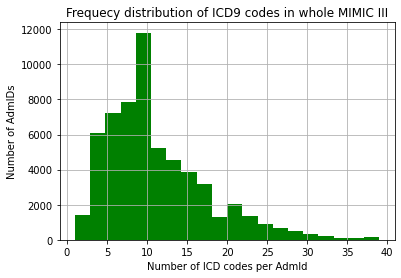

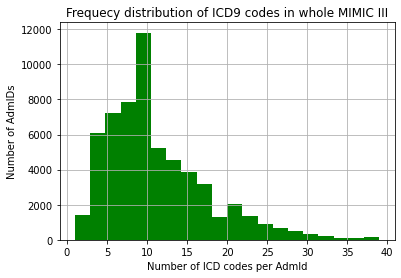

In [209]:
# frequency distribution of number of ICD codes for each admids
fig = plt.figure()
plt.hist(allmimic_groupbyHADMID.ICD9_CODE.apply(lambda x:len(x)),bins=20,color='g')
plt.grid(True)
plt.xlabel('Number of ICD codes per AdmId')
plt.ylabel('Number of AdmIDs')
plt.title('Frequecy distribution of ICD9 codes in whole MIMIC III')
plt.show()
fig.savefig('/content/drive/MyDrive/AlgoIntern/Images/all_mimic_icd9.png', bbox_inches = 'tight')
Image('/content/drive/MyDrive/AlgoIntern/Images/all_mimic_icd9.png')

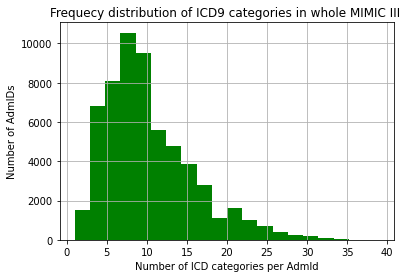

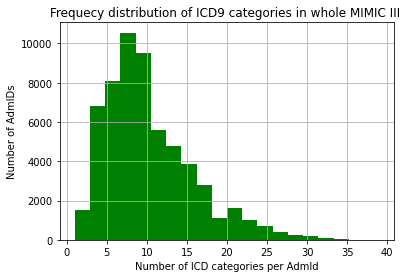

In [210]:
# frequency distribution of number of ICD categories for each admids
fig = plt.figure()
plt.hist(allmimic_groupbyHADMID.ICD9_CATEGORY.apply(lambda x:len(x)),bins=20,color='g')
plt.grid(True)
plt.xlabel('Number of ICD categories per AdmId')
plt.ylabel('Number of AdmIDs')
plt.title('Frequecy distribution of ICD9 categories in whole MIMIC III ')
plt.show()
fig.savefig('/content/drive/MyDrive/AlgoIntern/Images/all_mimic_icd9_cat.png', bbox_inches = 'tight')
Image('/content/drive/MyDrive/AlgoIntern/Images/all_mimic_icd9_cat.png')

# NOTEEVENTS

In [211]:
# all noteevents data
noteevents=pd.read_csv('/content/drive/MyDrive/AlgoIntern/Data/Data0.0/NOTEEVENTS.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [212]:
noteevents.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...


In [213]:
len(noteevents)

2083180

In [214]:
# unique patients
noteevents['SUBJECT_ID'].nunique()

46146

In [215]:
# unique number of admids in noteevents table
noteevents.HADM_ID.nunique()

58361

In [216]:
# there are notes that donot  have admids
noteevents.loc[noteevents.HADM_ID.isna()].count()

ROW_ID         231836
SUBJECT_ID     231836
HADM_ID             0
CHARTDATE      231836
CHARTTIME      147149
STORETIME        5859
CATEGORY       231836
DESCRIPTION    231836
CGID             5859
ISERROR             7
TEXT           231836
dtype: int64

In [217]:
noteevents.loc[noteevents.HADM_ID.isna()]

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
52115,59660,82208,NaN,2200-01-02,NaN,NaN,Echo,Report,NaN,NaN,PATIENT/TEST INFORMATION:\nIndication: Congest...
52116,59669,15472,NaN,2176-05-28,NaN,NaN,Echo,Report,NaN,NaN,PATIENT/TEST INFORMATION:\nIndication: Left ve...
59102,59770,96774,NaN,2174-03-31,NaN,NaN,Echo,Report,NaN,NaN,PATIENT/TEST INFORMATION:\nIndication: Dyspnea...
59119,59805,1136,NaN,2193-09-19,NaN,NaN,Echo,Report,NaN,NaN,PATIENT/TEST INFORMATION:\nIndication: Pericar...
59121,59807,98046,NaN,2198-09-13,NaN,NaN,Echo,Report,NaN,NaN,PATIENT/TEST INFORMATION:\nIndication: s/p AVR...
...,...,...,...,...,...,...,...,...,...,...,...
2067614,2039811,26525,NaN,2137-01-10,2137-01-10 14:30:00,2137-01-10 14:37:00,Nursing/other,Report,21232.0,NaN,Nursing Progress Note:\nAdmitted infant girl [...
2067615,2039812,26525,NaN,2137-01-10,2137-01-10 14:34:00,2137-01-10 14:53:00,Nursing/other,Report,20800.0,NaN,Neonatology Sr. Fellow Admission and Transfer ...
2067632,2039813,26525,NaN,2137-01-10,2137-01-10 19:16:00,2137-01-10 19:26:00,Nursing/other,Report,16888.0,NaN,Neonatology\n[**Known lastname 2666**] has ret...
2067633,2039814,26525,NaN,2137-01-10,2137-01-10 19:21:00,2137-01-10 20:19:00,Nursing/other,Report,21232.0,NaN,Re-admit/NPN Note:\nInfant returned from TCH v...


In [218]:
# all the admids of the notevents table 
admids_noteevents=list(set([item for item in  noteevents.loc[~noteevents.HADM_ID.isna()].HADM_ID.to_list()]))

In [219]:
len(admids_noteevents)

58361

In [220]:
# getting ICD codes for each admid of notevents table
noteevents_icd=allmimic_groupbyHADMID.loc[allmimic_groupbyHADMID.HADM_ID.isin(admids_noteevents)]

In [221]:
noteevents_icd

,HADM_ID,ICD9_CODE,ICD9_CATEGORY
0,100001,"[V5867, 25063, 25013, 4580, 25083, 40390, 5780...","[536, V58, 403, 707, V13, 250, 337, 584, 458, ..."
1,100003,"[5715, 53789, 4019, 2851, 45621, 53550, 07054,...","[571, 285, 535, 456, 531, 782, 537, 401, 070]"
2,100006,"[49320, 3090, V1251, 7850, 20300, 2761, V1582,...","[203, 309, V12, 785, V15, 276, 493, 486, 518]"
3,100007,"[56081, 4019, 5570, 9973, 486]","[557, 560, 401, 486, 997]"
4,100009,"[4142, 27800, 4111, 41401, V4582, 44021, V153,...","[V58, 250, 285, 411, 272, V85, 426, 996, V45, ..."
...,...,...,...
58924,199993,"[42821, 42731, 2760, 5119, 5184, 4240, 4271, 5...","[410, 427, 511, 428, 276, 518, 424]"
58925,199994,"[4280, 496, 51881, 42732, 4169, 585, 2762, 486...","[397, 496, 416, 427, 585, 276, 486, 428, 518]"
58926,199995,"[04111, 4210, 7464, 3051, V1259, 30401, 30503,...","[304, 441, 442, 421, 746, V12, 429, 041, 305]"
58927,199998,"[9975, 78820, 4111, 41401, 4439, 4293, 4019, 4...","[401, 272, 411, 443, V45, 427, 440, 788, 429, ..."


In [222]:
len(noteevents_icd)

58328

In [223]:
#noteevent admids that do not have ICD codes
admids_noteevents_withoutICD=list(set(admids_noteevents) - set(noteevents_icd.HADM_ID.to_list()))

In [224]:
len(admids_noteevents_withoutICD)

33

In [225]:
# noteevents admids without icdcodes are subset of allmimic admids without ICD codes
set(admids_noteevents_withoutICD).issubset(set(admids_without_icd9code))

True

In [226]:
# total ICD9 codes for notevents table 
total_icd9codes_noteevents=list(set([item for innerlist in noteevents_icd.ICD9_CODE.to_list() for item in innerlist]))

In [227]:
len(total_icd9codes_noteevents)

6967

In [228]:
# total ICD9 categories for noteevents table
total_icd9categories_noteevents=list(set([item for innerlist in noteevents_icd.ICD9_CATEGORY.to_list() for item in innerlist]))

In [229]:
len(total_icd9categories_noteevents)

1070

In [230]:
# different categories of notes in noteevents
different_note_category=noteevents.CATEGORY.unique().tolist()

category_hadmids={'Note Category':[],'Patients':[],'Hospital Admissions':[]}
for i in different_note_category:
  category_hadmids['Note Category'].append(i)
  category_hadmids['Patients'].append(noteevents.loc[noteevents.CATEGORY==i].SUBJECT_ID.nunique())
  category_hadmids['Hospital Admissions'].append(noteevents.loc[noteevents.CATEGORY==i].HADM_ID.nunique())
pd.DataFrame.from_dict(category_hadmids)

,Note Category,Patients,Hospital Admissions
0,Discharge summary,41127,52726
1,Echo,22316,23585
2,ECG,35366,44185
3,Nursing,7704,9070
4,Physician,7623,8983
5,Rehab Services,2130,2249
6,Case Management,576,619
7,Respiratory,3598,3986
8,Nutrition,2823,3167
9,General,2908,3170


In [231]:
# pd.DataFrame.from_dict(category_hadmids).to_csv('/content/drive/MyDrive/AlgoIntern/Images/different_note_category.csv',index = False)

# Discharge Summaries

>'notes_icd' contains merged tables of 'adm_ids' and 'discharge summarry table'
>> There are total <strong><u>52726</u></strong><sup>*</sup> admission ids in discharge summary, with corresponding <strong><u>6918</u></strong> ICD9 codes and <strong><u>1069</u></strong> ICD9 categories.<br>
<sup>*</sup>4 (actually 6 but 4 are unique) do not have any corresponding ICD codes. These are part of 47 discussed above

In [232]:
discharge_summary = pd.read_csv('/content/drive/MyDrive/AlgoIntern/Data/Data1.0/Dischargesummary.csv')

In [233]:
discharge_summary.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...


In [234]:
len(discharge_summary)

59652

In [235]:
# Unique category of notesevents table here- 'discharge summaries'
discharge_summary.CATEGORY.unique()

array(['Discharge summary'], dtype=object)

In [236]:
# Unique patients
discharge_summary.SUBJECT_ID.nunique()

41127

In [237]:
# Unique Admids in the discharge summaries
discharge_summary.HADM_ID.nunique()

52726

In [238]:
#number of admids that are nan
discharge_summary.loc[discharge_summary.HADM_ID.isna()].count()

ROW_ID         0
SUBJECT_ID     0
HADM_ID        0
CHARTDATE      0
CHARTTIME      0
STORETIME      0
CATEGORY       0
DESCRIPTION    0
CGID           0
ISERROR        0
TEXT           0
dtype: int64

In [239]:
#number of text that are nan
discharge_summary.loc[discharge_summary.TEXT.isna()].count()

ROW_ID         0
SUBJECT_ID     0
HADM_ID        0
CHARTDATE      0
CHARTTIME      0
STORETIME      0
CATEGORY       0
DESCRIPTION    0
CGID           0
ISERROR        0
TEXT           0
dtype: int64

In [240]:
admids_dischargesummary = list(set(discharge_summary['HADM_ID'].to_list()))

In [241]:
len(admids_dischargesummary)

52726

In [242]:
discharge_summary_icd = allmimic_groupbyHADMID.loc[allmimic_groupbyHADMID.HADM_ID.isin(admids_dischargesummary)]

In [243]:
discharge_summary_icd.head()

,HADM_ID,ICD9_CODE,ICD9_CATEGORY
0,100001,"[V5867, 25063, 25013, 4580, 25083, 40390, 5780...","[536, V58, 403, 707, V13, 250, 337, 584, 458, ..."
1,100003,"[5715, 53789, 4019, 2851, 45621, 53550, 07054,...","[571, 285, 535, 456, 531, 782, 537, 401, 070]"
2,100006,"[49320, 3090, V1251, 7850, 20300, 2761, V1582,...","[203, 309, V12, 785, V15, 276, 493, 486, 518]"
3,100007,"[56081, 4019, 5570, 9973, 486]","[557, 560, 401, 486, 997]"
4,100009,"[4142, 27800, 4111, 41401, V4582, 44021, V153,...","[V58, 250, 285, 411, 272, V85, 426, 996, V45, ..."


In [244]:
len(discharge_summary_icd)

52722

In [245]:
from tqdm import tqdm 
notes_distribution = {'HADM_ID':[],'note_length':[]}
for i in tqdm(discharge_summary_icd.HADM_ID.to_list()):
  notes_distribution['HADM_ID'].append(i)
  note_length = sum([len(j) for j in discharge_summary.loc[discharge_summary.HADM_ID == i].TEXT.to_list()])
  notes_distribution['note_length'].append(note_length)

100%|██████████| 52722/52722 [00:50<00:00, 1048.02it/s]


In [246]:
notes_distribution_df = pd.DataFrame.from_dict(notes_distribution)

In [247]:
notes_distribution_df.head(5)

,HADM_ID,note_length
0,100001,8285
1,100003,9981
2,100006,9415
3,100007,7857
4,100009,11276


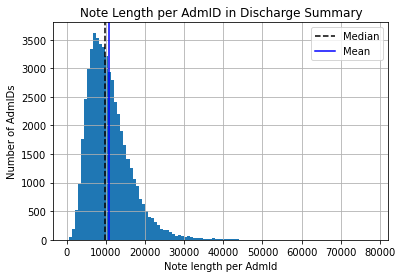

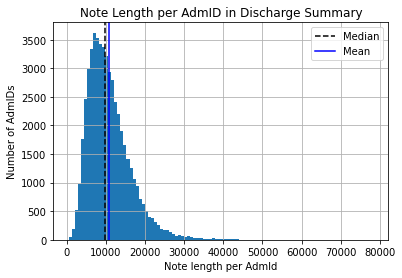

In [248]:
fig = plt.figure()
plt.grid()
plt.hist(notes_distribution_df.note_length, bins = 100)
plt.xlabel('Note length per AdmId')
plt.ylabel('Number of AdmIDs')
plt.title('Note Length per AdmID in Discharge Summary')
plt.axvline(x = notes_distribution_df.note_length.median(), label = 'Median' , c='k', linestyle = '--')
plt.axvline(x = notes_distribution_df.note_length.mean(), label = 'Mean' , c='b')
plt.legend()
plt.show()
fig.savefig('/content/drive/MyDrive/AlgoIntern/Images/discharge_summary_note_length.png', bbox_inches='tight')
Image('/content/drive/MyDrive/AlgoIntern/Images/discharge_summary_note_length.png')

In [249]:
print("Median number of note length for each admid:",notes_distribution_df.note_length.median())
print("Mean number of note length for each admid:",notes_distribution_df.note_length.mean())

Median number of note length for each admid: 9874.5
Mean number of note length for each admid: 10882.564754751336


In [250]:
# admids that have discharge summaries but not ICD codes
admids_dischargesummary_withoutICD = list(set(admids_dischargesummary) - set(discharge_summary_icd.HADM_ID.to_list()))

In [251]:
len(admids_dischargesummary_withoutICD)

4

In [252]:
icd9_codes_dischargesummary = [a for b in discharge_summary_icd.ICD9_CODE.to_list() for a in b]

In [253]:
dict_count_icd9_codes=dict(sorted(dict(Counter(icd9_codes_dischargesummary)).items(),key=lambda x:x[1],reverse=True))

Dictionary of counts of different ICD codes in the discharge table (not in the whole dataset) .

In [254]:
print(dict_count_icd9_codes)

{'4019': 20046, '4280': 12842, '42731': 12589, '41401': 12178, '5849': 8906, '25000': 8783, '2724': 8503, '51881': 7249, '5990': 6442, '53081': 6154, '2720': 5766, '2859': 5295, '2449': 4785, '486': 4732, '2851': 4499, '2762': 4358, '496': 4296, '99592': 3792, 'V5861': 3697, '5070': 3592, '0389': 3580, '5859': 3367, '40390': 3350, '311': 3347, '3051': 3272, '412': 3203, '2875': 3002, '41071': 3001, '2761': 2985, 'V4581': 2943, '4240': 2876, 'V1582': 2741, '5119': 2693, 'V4582': 2651, '40391': 2566, 'V290': 2529, '4241': 2517, '78552': 2501, 'V5867': 2497, '42789': 2396, '32723': 2328, '9971': 2313, '5845': 2223, '2760': 2221, '7742': 2183, '5180': 2137, 'V053': 2119, '4168': 2118, '49390': 2113, '2767': 2111, '45829': 2094, '2749': 2033, '4589': 1992, '73300': 1909, '78039': 1879, '5856': 1868, '5185': 1778, '4271': 1767, '4254': 1666, '4111': 1649, 'V1251': 1567, '30000': 1552, '3572': 1552, '99811': 1508, '27800': 1483, '7907': 1472, 'E8798': 1466, '60000': 1464, '2930': 1434, '41400

In [255]:
len(dict_count_icd9_codes)

6918

In [256]:
icd9_category_dischargesummary=[a for b in discharge_summary_icd.ICD9_CATEGORY.to_list() for a in b]

In [257]:
dict_count_icd9_category=dict(sorted(dict(Counter(icd9_category_dischargesummary)).items(),key=lambda x: x[1],reverse=True))

In [258]:
print(dict_count_icd9_category)

{'401': 20646, '427': 16774, '276': 14712, '272': 14212, '414': 14081, '250': 13818, '428': 13330, '518': 12997, '285': 12404, '584': 11147, 'V45': 8846, '599': 7199, '530': 7191, 'V58': 6998, '585': 6764, '403': 6297, 'V10': 6204, '038': 6085, '995': 5480, '424': 5404, '410': 5301, '780': 5296, '244': 5101, '997': 5078, '785': 5048, '305': 5000, '998': 4948, '458': 4935, '486': 4732, 'V15': 4420, '041': 4399, '496': 4296, '996': 4251, 'E878': 3959, '287': 3881, 'V12': 3782, '790': 3672, '507': 3608, '493': 3400, '311': 3347, '511': 3218, '412': 3203, '707': 3117, '348': 3112, '765': 2959, '571': 2865, '300': 2855, '733': 2749, '278': 2664, '416': 2636, 'V29': 2591, 'E879': 2550, '774': 2522, '070': 2481, '578': 2382, '787': 2359, 'V30': 2349, '327': 2349, '770': 2297, '274': 2295, '482': 2197, '280': 2148, 'V49': 2142, 'V43': 2131, 'V05': 2126, '425': 2056, '303': 2024, 'E849': 1983, '286': 1961, '789': 1960, '788': 1952, '294': 1927, '600': 1901, '411': 1900, '440': 1816, '560': 1767

In [259]:
len(dict_count_icd9_category)

1069

<table>
<tr>
<th> Datasets</th>
<th> Number of admissionIds</th>
<th> %coverage</th>
</tr>
<tr>
<td>Top 10 ICD9 codes</td>
<td>40562</td>
<td>76.93%</td>
</tr>
<tr>
<td>Top 20 ICD9 codes</td>
<td>43958</td>
<td>83.37%</td>
</tr>
<tr>
<td>Top 50 ICD9 codes</td>
<td>49534</td>
<td>93.95%</td>
</tr>
<tr>
<td>Top 10 ICD9 categories</td>
<td>44419</td>
<td>84.24%</td>
</tr>
<tr>
<td>Top 20 ICD9 categories</td>
<td>46143</td>
<td>87.51%</td>
</tr>
<tr>
<td>Top 50 ICD9 categories</td>
<td>51034</td>
<td>96.79%</td>
</tr>
</table>
This table shows how many average ICD9 codes are categories are there for each admids 
<table>
<tr><th>Type of ICD</th><th>Mean</th><th>Median</th></tr>
<tr><td>ICD9 codes</td><td>11.74</td><td>10</td></tr>
<tr><td>ICD9 categories</td><td>10.79</td><td>9</td></tr>
</table>

In [260]:
top10_icd9codes=list(dict_count_icd9_codes.keys())[:10]
top20_icd9codes=list(dict_count_icd9_codes.keys())[:20]
top50_icd9codes=list(dict_count_icd9_codes.keys())[:50]
top100_icd9codes=list(dict_count_icd9_codes.keys())[:100]

In [261]:
discharge_summary_icd.loc[discharge_summary_icd.ICD9_CODE.apply(lambda x:any(item in top10_icd9codes for item in x))].HADM_ID.count()

40562

In [262]:
discharge_summary_icd.loc[discharge_summary_icd.ICD9_CODE.apply(lambda x:any(item in top20_icd9codes for item in x))].HADM_ID.count()

43958

In [263]:
discharge_summary_icd.loc[discharge_summary_icd.ICD9_CODE.apply(lambda x:any(item in top50_icd9codes for item in x))].HADM_ID.count()

49354

In [264]:
discharge_summary_icd.loc[discharge_summary_icd.ICD9_CODE.apply(lambda x:any(item in top100_icd9codes for item in x))].HADM_ID.count()

50625

In [265]:
def list_contains(List1, List2): 
  check = False

  # Iterate in the 1st list 
  for m in List1: 
    # Iterate in the 2nd list 
    for n in List2: 
      # if there is a match
      if m == n: 
        check = True
        return check  
                  
  return check 

In [266]:
# from tqdm import tqdm
# cummulative_icd9 = {'No. of ICD9 code':[], 'Cummulative distribution':[]}
# for i in tqdm(range(1,len(dict_count_icd9_codes)+1)):
#   icd_codes = list(dict_count_icd9_codes.keys())[:i]
#   cummulative = discharge_summary_icd.loc[discharge_summary_icd.ICD9_CODE.apply(lambda x:any(item in icd_codes for item in x))].HADM_ID.count()
#   cummulative_icd9['No. of ICD9 code'].append(i)
#   cummulative_icd9['Cummulative distribution'].append(cummulative)

In [267]:
# from tqdm import tqdm
# cummulative_icd9 = {'No. of ICD9 code':[], 'Cummulative distribution':[]}

# for i in tqdm(range(1,len(dict_count_icd9_codes)+1)):
#   icd_codes = list(dict_count_icd9_codes.keys())[:i]
#   cummulative = discharge_summary_icd.loc[discharge_summary_icd.ICD9_CODE.apply(lambda x:list_contains(x,icd_codes))].HADM_ID.count()
#   cummulative_icd9['No. of ICD9 code'].append(i)
#   cummulative_icd9['Cummulative distribution'].append(cummulative)

In [268]:
# pd.DataFrame.from_dict(cummulative_icd9)

In [269]:
# pd.DataFrame.from_dict(cummulative_icd9).to_csv('/content/drive/MyDrive/AlgoIntern/Images/cummulative_icd9.csv',index = False)

In [270]:
cummulative_icd9_df = pd.read_csv('/content/drive/MyDrive/AlgoIntern/Images/cummulative_icd9.csv')

In [271]:
cummulative_icd9_df.head()

,No. of ICD9 code,Cummulative distribution
0,1,20046
1,2,28223
2,3,31548
3,4,33528
4,5,35864


In [272]:
cummulative_icd9_df['fraction'] = cummulative_icd9_df['Cummulative distribution'].apply(lambda x : x/len(discharge_summary_icd))

In [273]:
cummulative_icd9_df.head(10)

,No. of ICD9 code,Cummulative distribution,fraction
0,1,20046,0.380221
1,2,28223,0.535317
2,3,31548,0.598384
3,4,33528,0.635939
4,5,35864,0.680247
5,6,36782,0.697659
6,7,37446,0.710254
7,8,38881,0.737472
8,9,39755,0.754050
9,10,40562,0.769356


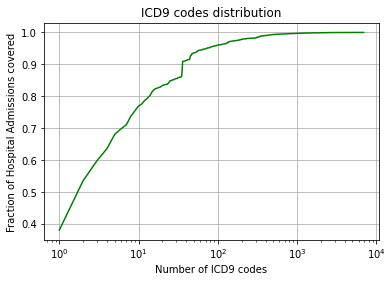

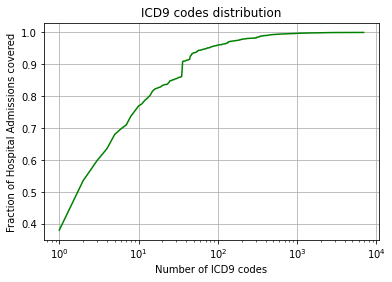

In [274]:
fig = plt.figure()
plt.grid()
plt.plot(cummulative_icd9_df['No. of ICD9 code'],cummulative_icd9_df['fraction'], c = 'g')
plt.xscale('log')
plt.xlabel('Number of ICD9 codes')
plt.ylabel('Fraction of Hospital Admissions covered')
plt.title('ICD9 codes distribution')
plt.show()
fig.savefig('/content/drive/MyDrive/AlgoIntern/Images/cummulative_icd9.png', bbox_inches='tight')
Image('/content/drive/MyDrive/AlgoIntern/Images/cummulative_icd9.png')

In [275]:
from tqdm import tqdm
cummulative_icd9_category = {'No. of ICD9 category':[], 'Cummulative distribution':[]}

for i in tqdm(range(1,len(dict_count_icd9_category)+1)):
  icd_codes = list(dict_count_icd9_category.keys())[:i]
  cummulative = discharge_summary_icd.loc[discharge_summary_icd.ICD9_CATEGORY.apply(lambda x:list_contains(x,icd_codes))].HADM_ID.count()
  cummulative_icd9_category['No. of ICD9 category'].append(i)
  cummulative_icd9_category['Cummulative distribution'].append(cummulative)

100%|██████████| 1069/1069 [04:20<00:00,  4.11it/s]


In [276]:
cummulative_icd9_category_df = pd.DataFrame.from_dict(cummulative_icd9_category)
cummulative_icd9_category_df['fraction'] = cummulative_icd9_category_df['Cummulative distribution'].apply(lambda x : x/len(discharge_summary_icd))

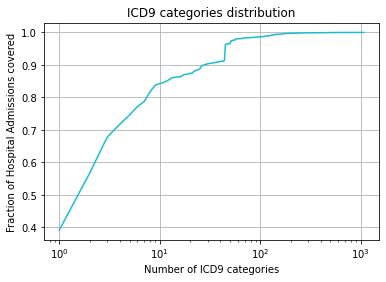

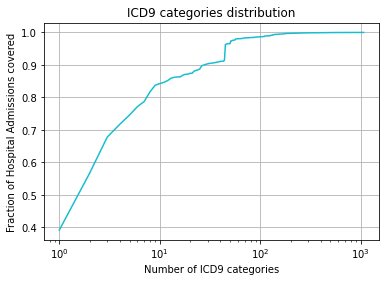

In [277]:
fig = plt.figure()
plt.grid()
plt.plot(cummulative_icd9_category_df['No. of ICD9 category'],cummulative_icd9_category_df['fraction'], c = 'tab:cyan')
plt.xscale('log')
plt.xlabel('Number of ICD9 categories')
plt.ylabel('Fraction of Hospital Admissions covered')
plt.title('ICD9 categories distribution')
plt.show()
fig.savefig('/content/drive/MyDrive/AlgoIntern/Images/cummulative_icd9_category.png', bbox_inches='tight')
Image('/content/drive/MyDrive/AlgoIntern/Images/cummulative_icd9_category.png')

In [278]:
top10_icd9category=list(dict_count_icd9_category.keys())[:10]
top20_icd9category=list(dict_count_icd9_category.keys())[:20]
top50_icd9category=list(dict_count_icd9_category.keys())[:50]
top100_icd9category=list(dict_count_icd9_category.keys())[:100]

In [279]:
discharge_summary_icd.loc[discharge_summary_icd.ICD9_CATEGORY.apply(lambda x:any(item in top10_icd9category for item in x))].HADM_ID.count()

44419

In [280]:
discharge_summary_icd.loc[discharge_summary_icd.ICD9_CATEGORY.apply(lambda x:any(item in top20_icd9category for item in x))].HADM_ID.count()

46089

In [281]:
discharge_summary_icd.loc[discharge_summary_icd.ICD9_CATEGORY.apply(lambda x:any(item in top50_icd9category for item in x))].HADM_ID.count()

50903

In [282]:
discharge_summary_icd.loc[discharge_summary_icd.ICD9_CATEGORY.apply(lambda x:any(item in top100_icd9category for item in x))].HADM_ID.count()

52007

In [283]:
print("Median number of ICD9 codes for each admid:",discharge_summary_icd.ICD9_CODE.apply(lambda x:len(x)).median())
print("Mean number of ICD9 codes for each admid:",discharge_summary_icd.ICD9_CODE.apply(lambda x:len(x)).mean())

Median number of ICD9 codes for each admid: 10.0
Mean number of ICD9 codes for each admid: 11.739729145328326


In [284]:
print("Median number of ICD9 category for each admid:",discharge_summary_icd.ICD9_CATEGORY.apply(lambda x:len(x)).median())
print("Mean number of ICD9 category for each admid:",discharge_summary_icd.ICD9_CATEGORY.apply(lambda x:len(x)).mean())

Median number of ICD9 category for each admid: 9.0
Mean number of ICD9 category for each admid: 10.80736694359091


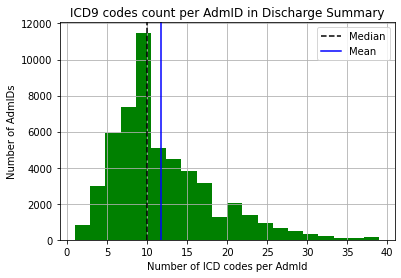

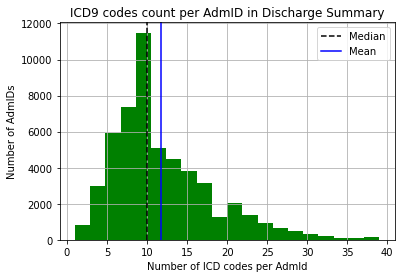

In [285]:
fig = plt.figure()
plt.hist(discharge_summary_icd.ICD9_CODE.apply(lambda x:len(x)),bins=20,color='g')
plt.grid(True)
plt.xlabel('Number of ICD codes per AdmId')
plt.ylabel('Number of AdmIDs')
plt.title('ICD9 codes count per AdmID in Discharge Summary')
plt.axvline(x = discharge_summary_icd.ICD9_CODE.apply(lambda x:len(x)).median(), label = 'Median' , c='k', linestyle = '--')
plt.axvline(x = discharge_summary_icd.ICD9_CODE.apply(lambda x:len(x)).mean(), label = 'Mean' , c='b')
plt.legend()
plt.show()
fig.savefig('/content/drive/MyDrive/AlgoIntern/Images/discharge_summary_icd9.png', bbox_inches='tight')
Image('/content/drive/MyDrive/AlgoIntern/Images/discharge_summary_icd9.png')

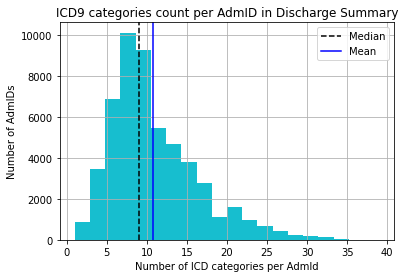

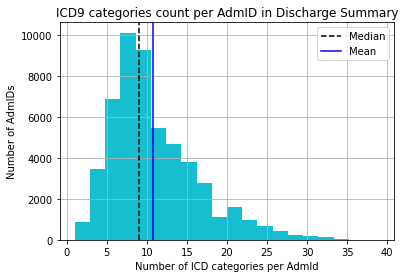

In [286]:
fig = plt.figure()
plt.hist(discharge_summary_icd.ICD9_CATEGORY.apply(lambda x:len(x)),bins=20,color='tab:cyan')
plt.grid(True)
plt.xlabel('Number of ICD categories per AdmId')
plt.ylabel('Number of AdmIDs')
plt.title('ICD9 categories count per AdmID in Discharge Summary')
plt.axvline(x = discharge_summary_icd.ICD9_CATEGORY.apply(lambda x:len(x)).median(), label = 'Median' , c='k', linestyle = '--')
plt.axvline(x = discharge_summary_icd.ICD9_CATEGORY.apply(lambda x:len(x)).mean(), label = 'Mean' , c='b')
plt.legend()
plt.show()
fig.savefig('/content/drive/MyDrive/AlgoIntern/Images/discharge_summary_icd9_cat.png', bbox_inches='tight')
Image('/content/drive/MyDrive/AlgoIntern/Images/discharge_summary_icd9_cat.png')

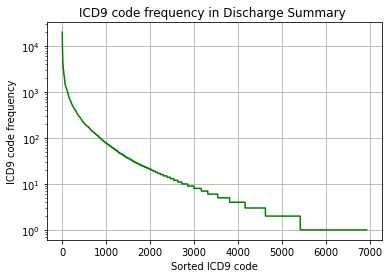

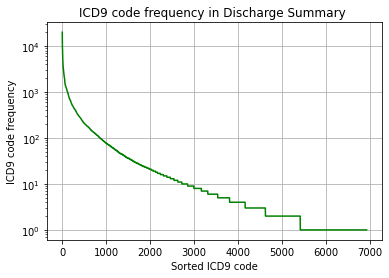

In [287]:
fig = plt.figure()
plt.grid()
plt.plot(range(1,len(dict_count_icd9_codes)+1),list(dict_count_icd9_codes.values()), c='g')
plt.yscale('log')
plt.xlabel("Sorted ICD9 code")
plt.ylabel("ICD9 code frequency")
plt.title("ICD9 code frequency in Discharge Summary ")
plt.show()
fig.savefig('/content/drive/MyDrive/AlgoIntern/Images/dischargesummary_icd9freq.png', bbox_inches = 'tight')
Image('/content/drive/MyDrive/AlgoIntern/Images/dischargesummary_icd9freq.png')

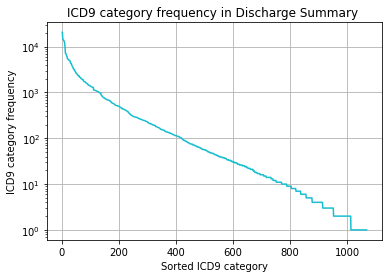

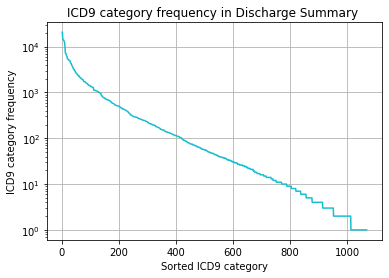

In [288]:
fig = plt.figure()
plt.grid()
plt.plot(range(1,len(dict_count_icd9_category)+1),list(dict_count_icd9_category.values()), c='tab:cyan')
plt.yscale('log')
plt.xlabel("Sorted ICD9 category")
plt.ylabel("ICD9 category frequency")
plt.title("ICD9 category frequency in Discharge Summary ")
plt.show()
fig.savefig('/content/drive/MyDrive/AlgoIntern/Images/dischargesummary_icd9catfreq.png', bbox_inches = 'tight')
Image('/content/drive/MyDrive/AlgoIntern/Images/dischargesummary_icd9catfreq.png')

In [289]:
top10_icd9code_def=pd.DataFrame.from_dict({'ICD9_CODE':[i for i in top10_icd9codes],
                                    'Desc':[def_icd9code.loc[def_icd9code.ICD9_CODE==i].LONG_TITLE.item() for i in top10_icd9codes]})

In [290]:
top10_icd9code_def

,ICD9_CODE,Desc
0,4019,Unspecified essential hypertension
1,4280,"Congestive heart failure, unspecified"
2,42731,Atrial fibrillation
3,41401,Coronary atherosclerosis of native coronary ar...
4,5849,"Acute kidney failure, unspecified"
5,25000,Diabetes mellitus without mention of complicat...
6,2724,Other and unspecified hyperlipidemia
7,51881,Acute respiratory failure
8,5990,"Urinary tract infection, site not specified"
9,53081,Esophageal reflux


In [291]:
# top10_icd9code_def.to_csv("/content/drive/MyDrive/AlgoIntern/Images/top10icd_def.csv",index=False)

# All MIMIC procedures

Procedure codes in the whole MIMIC dataset. There are 52243 AdmIDs are there for which there are 2009 ICD9 PCS codes.<br> In the discharge summary which has 52726 admids there are ICD9 PCS codes for only 46841 (5885 do not have any codes corresponding to them). There are total 1989 unique ICD9 PCS codes in the discharge summary.

In [292]:
# all mimic procedures 
allmimic_procedure=pd.read_csv('/content/drive/My Drive/AlgoIntern/Data/PROCEDURES_ICD.csv')

FileNotFoundError: ignored

In [ ]:
allmimic_procedure.head()

In [ ]:
# unique admids for procedures
allmimic_procedure.HADM_ID.nunique()

In [ ]:
# unique number of ICD9 pcs codes
allmimic_procedure.ICD9_CODE.nunique()

In [ ]:
adm_icdpcs=pd.read_csv('/content/drive/My Drive/AlgoIntern/Data/Data1.0/adm_icdpcs.csv')

In [ ]:
adm_icdpcs

In [ ]:
len(set([a for b in adm_icdpcs.ICD9_CODE.apply(split_string_list).to_list() for a in b]))

# NOTEEVENTS PROCEDURES

In [ ]:
noteevents_icdpcs=adm_icdpcs.loc[adm_icdpcs.HADM_ID.isin(admids_noteevents)]

In [ ]:
noteevents_icdpcs

# Discharge summaries ICDPCS

In [ ]:
notes_icd

In [ ]:
notes_icdpcs=notes_icd.dropna(subset=['ICD9_CODE_y'])

In [ ]:
notes_icdpcs.HADM_ID.nunique()

In [ ]:
notes_icd_agg['ICD9_CODE_y']=notes_icd_agg.ICD9_CODE_y.apply(split_string_list)

In [ ]:
total_icd9pcscodes=[a for b in notes_icd_agg.ICD9_CODE_y.to_list() for a in b if a != '']

In [ ]:
dict_count_icd9pcscodes=dict(Counter(total_icd9pcscodes))
dict_count_icd9pcscodes=dict(sorted(dict_count_icd9pcscodes.items(),key=lambda x:x[1],reverse=True))

In [ ]:
len(set(total_icd9pcscodes))

In [ ]:
len(dict_count_icd9pcscodes)

Mean and median number of ICD9 PCS codes for each AdmIDs in the discharge summary table.

In [ ]:
notes_icd_agg.ICD9_CODE_y.apply(lambda x:len(set(x))).mean()

In [ ]:
notes_icd_agg.ICD9_CODE_y.apply(lambda x:len(set(x))).median()

In [ ]:
print(dict_count_icd9pcscodes)

<table>
<tr>
<th>type of dataset</th><th>Number of Adm ids</th><th>% coverage</th>
</tr>
<tr>
<td>Top10 ICD9 PCS codes</td><td>33304</td><td>71.10%</td>
</tr>
<tr>
<td>Top20 ICD9 PCS codes</td><td>37931</td><td>80.98%</td>
</tr>
<tr>
<td>Top50 ICD9 PCS codes</td><td>40493</td><td>86.45%</td>
</tr>
</table>

In [ ]:
top10_icd9pcscodes=list(dict_count_icd9pcscodes.keys())[:10]
top20_icd9pcscodes=list(dict_count_icd9pcscodes.keys())[:20]
top50_icd9pcscodes=list(dict_count_icd9pcscodes.keys())[:50]

In [ ]:
top10_icd9pcscodes

In [ ]:
notes_icd_agg.loc[notes_icd_agg.ICD9_CODE_y.apply(lambda x:any(item in top10_icd9pcscodes for item in x))].HADM_ID.nunique()

In [ ]:
notes_icd_agg.loc[notes_icd_agg.ICD9_CODE_y.apply(lambda x:any(item in top20_icd9pcscodes for item in x))].HADM_ID.count()

In [ ]:
notes_icd_agg.loc[notes_icd_agg.ICD9_CODE_y.apply(lambda x:any(item in top50_icd9pcscodes for item in x))].HADM_ID.nunique()

# ICD10 code

In [293]:
icd10_def = pd.read_csv('/content/drive/MyDrive/AlgoIntern/Data/Data1.0/icd10_def.csv')
icd10_def.head(5)

,ICD9_CODE,ICD10,long_title
0,4019,I10,ESSENTIAL (PRIMARY) HYPERTENSION
1,4280,I509,"HEART FAILURE, UNSPECIFIED"
2,42731,I4891,UNSPECIFIED ATRIAL FIBRILLATION
3,41401,I2510,ATHEROSCLEROTIC HEART DISEASE OF NATIVE CORONA...
4,5849,N179,"ACUTE KIDNEY FAILURE, UNSPECIFIED"


In [294]:
icd10_def.head(5).to_csv("/content/drive/MyDrive/AlgoIntern/Images/icd10_def.csv",index=False)

In [295]:
admid_icd=pd.read_csv('/content/drive/MyDrive/AlgoIntern/Data/Data1.0/adm_icd.csv')

In [296]:
admid_icd.head()

,HADM_ID,ICD9_CODE,ICD10
0,100001,"5363,5853,36201,7078,V5867,25013,5849,25083,25...","N179,I129,Misc,Z794"
1,100003,"53789,4019,2851,5715,45621,53100,7823,07054,53550","I10,K740,K7460,K7469,Misc,D62,B182"
2,100006,"V1251,7850,20300,3090,2761,486,51881,V1582,49320","J189,Z86718,J9600,Z87891,Misc,J9690,E871"
3,100007,"4019,9973,5570,486,56081","J189,I10,Misc"
4,100009,"V153,4019,V4502,99604,41401,27800,4111,V5867,2...","I200,I2510,Z794,D649,I10,Z9861,E669,Z87891,Mis..."


In [297]:
discharge_summary_icd10 = admid_icd.loc[admid_icd.HADM_ID.isin(admids_dischargesummary)]

In [298]:
discharge_summary_icd10.head()

,HADM_ID,ICD9_CODE,ICD10
0,100001,"5363,5853,36201,7078,V5867,25013,5849,25083,25...","N179,I129,Misc,Z794"
1,100003,"53789,4019,2851,5715,45621,53100,7823,07054,53550","I10,K740,K7460,K7469,Misc,D62,B182"
2,100006,"V1251,7850,20300,3090,2761,486,51881,V1582,49320","J189,Z86718,J9600,Z87891,Misc,J9690,E871"
3,100007,"4019,9973,5570,486,56081","J189,I10,Misc"
4,100009,"V153,4019,V4502,99604,41401,27800,4111,V5867,2...","I200,I2510,Z794,D649,I10,Z9861,E669,Z87891,Mis..."


In [299]:
len(discharge_summary_icd10)

52722

In [300]:
discharge_summary_icd10.loc[discharge_summary_icd10.ICD10.apply(lambda x : True if len([code for code in re.split(',',x) if code != 'Misc']) else False)].count()

HADM_ID      50521
ICD9_CODE    50521
ICD10        50521
dtype: int64

In [301]:
icd10_freq=dict(sorted(
    dict(
        Counter(
            [code for innerlist in discharge_summary_icd10.ICD10.to_list() for code in re.split(',',innerlist) if code != 'Misc' ]
        )
    ).items(),
    key=lambda x:x[1],reverse=True
))

In [302]:
len(icd10_freq)

118

In [303]:
print(icd10_freq)

{'I10': 20046, 'I2510': 13595, 'I509': 12842, 'I4891': 12589, 'N179': 8906, 'E119': 8783, 'E784': 8503, 'E785': 8503, 'J9600': 7249, 'J9690': 7249, 'N390': 6442, 'K219': 6154, 'E780': 5766, 'D649': 5295, 'E039': 4785, 'J189': 4732, 'D62': 4499, 'E872': 4358, 'J449': 4296, 'A419': 4129, 'R6520': 3792, 'Z7901': 3697, 'J690': 3592, 'N189': 3367, 'I129': 3350, 'F329': 3347, 'F17200': 3272, 'I252': 3203, 'D696': 3002, 'I214': 3001, 'E871': 2985, 'Z951': 2943, 'I340': 2876, 'I348': 2876, 'Z87891': 2741, 'J918': 2693, 'Z9861': 2651, 'I120': 2566, 'P002': 2529, 'I359': 2517, 'I352': 2517, 'I350': 2517, 'I358': 2517, 'I351': 2517, 'R6521': 2501, 'Z794': 2497, 'R001': 2396, 'I498': 2396, 'G4733': 2328, 'I97710': 2313, 'I9788': 2313, 'I97790': 2313, 'I9789': 2313, 'N170': 2223, 'E870': 2221, 'P590': 2183, 'J9819': 2137, 'J9811': 2137, 'Z23': 2119, 'I272': 2118, 'I2789': 2118, 'J45909': 2113, 'J45998': 2113, 'E875': 2111, 'I9581': 2094, 'I952': 2094, 'M109': 2033, 'I959': 1992, 'M810': 1909, 'R569

In [304]:
top10_icd10 = list(icd10_freq.keys())[:10]
top20_icd10 = list(icd10_freq.keys())[:20]
top50_icd10 = list(icd10_freq.keys())[:50]
top100_icd10 = list(icd10_freq.keys())[:100]

In [305]:
top10_icd10_def = pd.DataFrame.from_dict({'ICD10':[i for i in top10_icd10],
                                    'Desc':[icd10_def.loc[icd10_def.ICD10==i].long_title.iloc[0] for i in top10_icd10]})

In [306]:
top10_icd10_def

,ICD10,Desc
0,I10,ESSENTIAL (PRIMARY) HYPERTENSION
1,I2510,ATHEROSCLEROTIC HEART DISEASE OF NATIVE CORONA...
2,I509,"HEART FAILURE, UNSPECIFIED"
3,I4891,UNSPECIFIED ATRIAL FIBRILLATION
4,N179,"ACUTE KIDNEY FAILURE, UNSPECIFIED"
5,E119,TYPE 2 DIABETES MELLITUS WITHOUT COMPLICATIONS
6,E784,OTHER HYPERLIPIDEMIA
7,E785,"HYPERLIPIDEMIA, UNSPECIFIED"
8,J9600,"ACUTE RESPIRATORY FAILURE, UNSPECIFIED WHETHER..."
9,J9690,"RESPIRATORY FAILURE, UNSPECIFIED, UNSPECIFIED ..."


In [307]:
# top10_icd10_def.to_csv("/content/drive/MyDrive/AlgoIntern/Images/top10icd10_def.csv",index=False)

In [308]:
discharge_summary_icd10.loc[discharge_summary_icd10.ICD10.apply(lambda x : list_contains([code for code in re.split(',',x) if code != 'Misc'],top10_icd10))].count()

HADM_ID      38959
ICD9_CODE    38959
ICD10        38959
dtype: int64

In [309]:
discharge_summary_icd10.loc[discharge_summary_icd10.ICD10.apply(lambda x : list_contains([code for code in re.split(',',x) if code != 'Misc'],top20_icd10))].count()

HADM_ID      43764
ICD9_CODE    43764
ICD10        43764
dtype: int64

In [310]:
discharge_summary_icd10.loc[discharge_summary_icd10.ICD10.apply(lambda x : list_contains([code for code in re.split(',',x) if code != 'Misc'],top50_icd10))].count()

HADM_ID      48199
ICD9_CODE    48199
ICD10        48199
dtype: int64

In [311]:
discharge_summary_icd10.loc[discharge_summary_icd10.ICD10.apply(lambda x : list_contains([code for code in re.split(',',x) if code != 'Misc'],top100_icd10))].count()

HADM_ID      50266
ICD9_CODE    50266
ICD10        50266
dtype: int64

In [312]:
discharge_summary_icd10.loc[discharge_summary_icd10.ICD10.apply(lambda x : list_contains([code for code in re.split(',',x) if code != 'Misc'],list(icd10_freq.keys())))].count()

HADM_ID      50521
ICD9_CODE    50521
ICD10        50521
dtype: int64

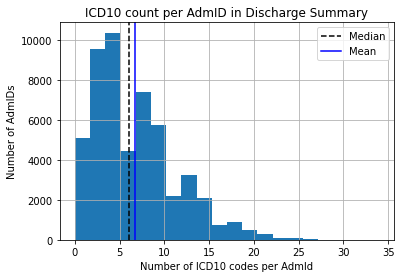

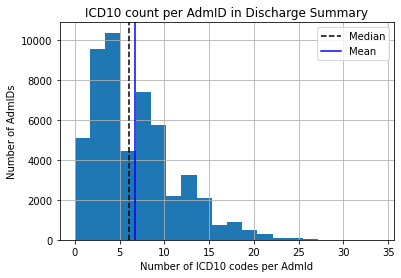

In [313]:
# distribution of number of ICD10 codes for given admid
fig = plt.figure()
plt.hist(discharge_summary_icd10.ICD10.apply(lambda x:len([code for code in re.split(',',x) if code != 'Misc'])), bins = 20)
plt.grid(True)
plt.xlabel('Number of ICD10 codes per AdmId')
plt.ylabel('Number of AdmIDs')
plt.title('ICD10 count per AdmID in Discharge Summary')
plt.axvline(x = discharge_summary_icd10.ICD10.apply(lambda x:len([code for code in re.split(',',x) if code != 'Misc'])).median(), label = 'Median' , c='k', linestyle = '--')
plt.axvline(x = discharge_summary_icd10.ICD10.apply(lambda x:len([code for code in re.split(',',x) if code != 'Misc'])).mean(), label = 'Mean' , c='b')
plt.legend()
plt.show()
fig.savefig('/content/drive/MyDrive/AlgoIntern/Images/discharge_summary_icd10.png', bbox_inches='tight')
Image('/content/drive/MyDrive/AlgoIntern/Images/discharge_summary_icd10.png')

In [314]:
print(" Mean number of ICD10 codes for given admid :",discharge_summary_icd10.ICD10.apply(lambda x:len([code for code in re.split(',',x) if code != 'Misc'])).mean())

 Mean number of ICD10 codes for given admid : 6.686165168240962


In [315]:
print(" Median number of ICD10 codes for given admid :",discharge_summary_icd10.ICD10.apply(lambda x:len([code for code in re.split(',',x) if code != 'Misc'])).median())

 Median number of ICD10 codes for given admid : 6.0


# ICD10 code PCS

In [ ]:
admid_icdpcs=pd.read_csv('/content/drive/MyDrive/AlgoIntern/Data/Data1.0/adm_icdpcs.csv')

In [ ]:
admid_icdpcs

In [ ]:
# distribution of number of ICD10 PCS codes for given admid
plt.hist(admid_icdpcs.icd10_pcs.apply(lambda x:len([code for code in re.split(',',x) if code != 'Misc'])))
plt.grid(True)

In [ ]:
print(" Mean number of ICD10 PCS codes for given admid :",sum(admid_icdpcs.icd10_pcs.apply(lambda x:len([code for code in re.split(',',x) if code != 'Misc'])))/len(admid_icdpcs))

In [ ]:
print(" Median number of ICD10 PCS codes for given admid :",admid_icdpcs.icd10_pcs.apply(lambda x:len([code for code in re.split(',',x) if code != 'Misc'])).median())

In [ ]:
icd10pcs_freq=sorted(
    dict(
        Counter(
            [code for innerlist in admid_icdpcs.icd10_pcs.to_list() for code in re.split(',',innerlist) if code != 'Misc' ]
        )
    ).items(),
    key=lambda x:x[1],reverse=True
)

In [ ]:
print(icd10pcs_freq)